In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Find out the features which correlated parameter is greater than 0.5
corr = df_train.corr()
correlated_features = list(corr[corr['SalePrice']>0.5].index)
print(correlated_features)
print(len(correlated_features))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


In [6]:
# Focus on the correlated features
# train_correlated_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
# test_correlated_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

# df_train = df_train[train_correlated_features]
# df_test = df_test[test_correlated_features]
# print(df_train.shape)
# print(df_test.shape)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

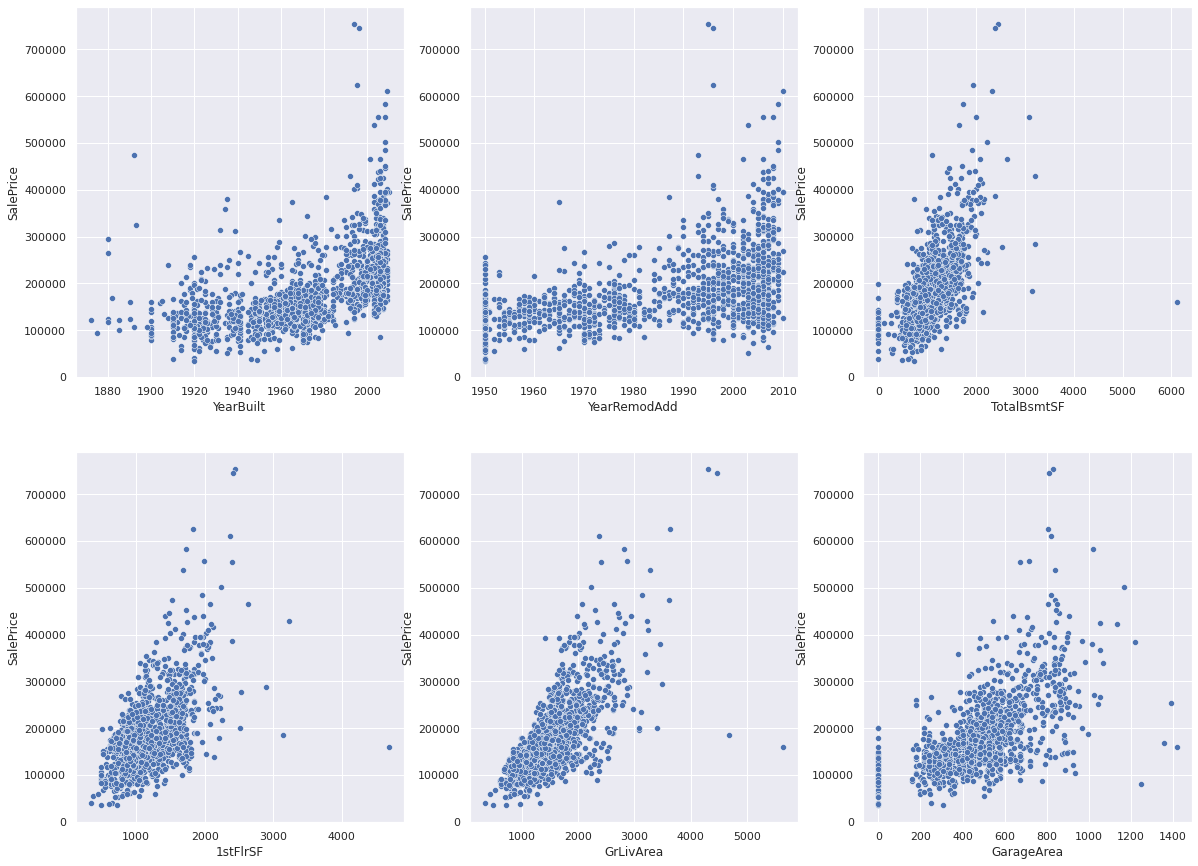

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

sns.scatterplot(ax=axs[0,0], x='YearBuilt', y='SalePrice', data=df_train)
sns.scatterplot(ax=axs[0,1], x='YearRemodAdd', y='SalePrice', data=df_train)
sns.scatterplot(ax=axs[0,2], x='TotalBsmtSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axs[1,0], x='1stFlrSF', y='SalePrice', data=df_train)
sns.scatterplot(ax=axs[1,1], x='GrLivArea', y='SalePrice', data=df_train)
sns.scatterplot(ax=axs[1,2], x='GarageArea', y='SalePrice', data=df_train)

# There are outliers in TotalBsmtSF, 1stFirSF and GrLivArea

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

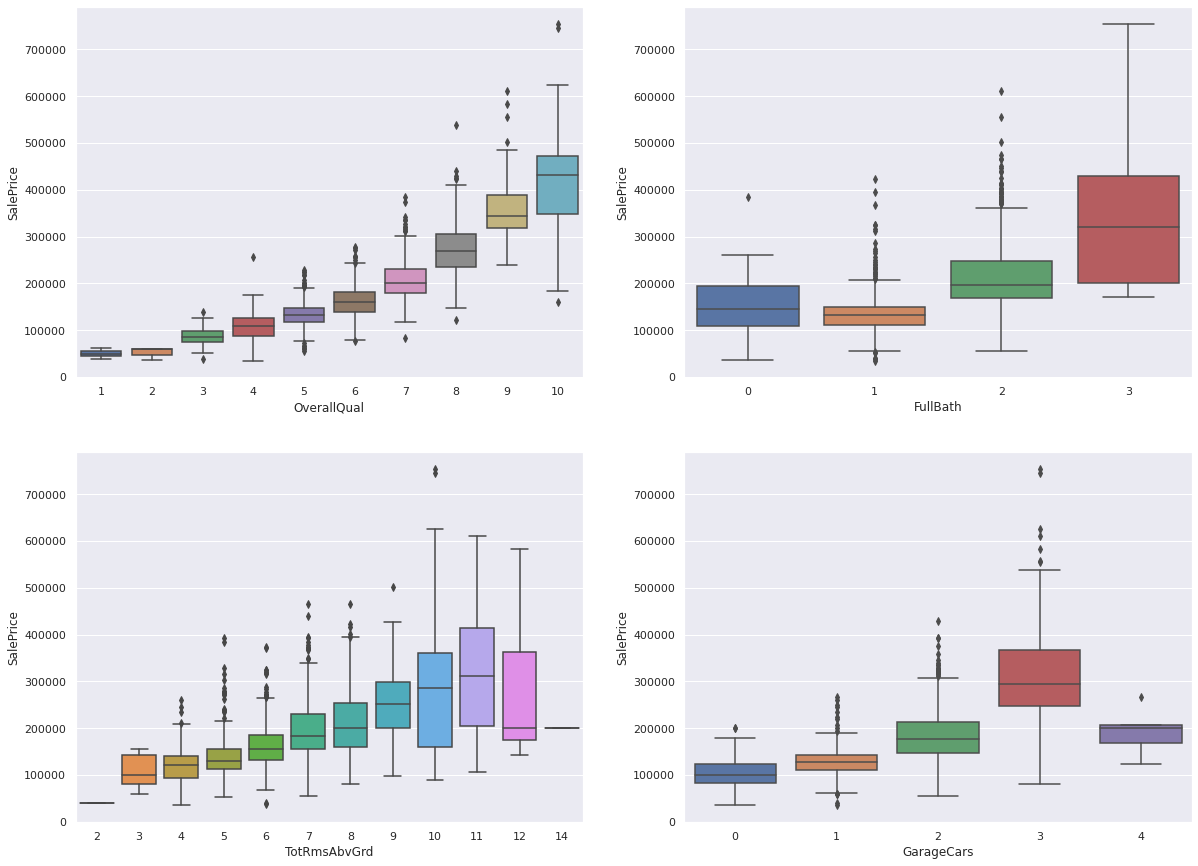

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.boxplot(ax=axs[0,0], x='OverallQual', y='SalePrice', data=df_train)
sns.boxplot(ax=axs[0,1], x='FullBath', y='SalePrice', data=df_train)
sns.boxplot(ax=axs[1,0], x='TotRmsAbvGrd', y='SalePrice', data=df_train)
sns.boxplot(ax=axs[1,1], x='GarageCars', y='SalePrice', data=df_train)

In [9]:
# Handling outliers
print('Before removing handling outliers: ',df_train.shape)
outliers_index = df_train[(df_train['TotalBsmtSF'] > 6000) | (df_train['1stFlrSF'] > 4000) | (df_train['GrLivArea'] > 4500)].index
df_train = df_train.drop(outliers_index)
print('After removing handling outliers: ',df_train.shape)

Before removing handling outliers:  (1460, 81)
After removing handling outliers:  (1458, 81)


In [10]:
# Check null values in train dataset
train_null_col = [col for col in df_train.columns if df_train[col].isnull().any()]
test_null_col = [col for col in df_test.columns if df_test[col].isnull().any()]
print(train_null_col)
print(test_null_col)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [11]:
# Handling null values with clear null definition
values = {
    'Alley': 'None',  # No alley
    'MasVnrType': 'None',  # No masonry veneer
    'MasVnrArea': 0,  # No masonry veneer
    'BsmtQual': 'None',  # No basement
    'BsmtCond': 'None',  # No basement
    'BsmtExposure': 'None',  # No basement
    'BsmtFinType1': 'None',  # No basement
    'BsmtFinType2': 'None',  # No basement
    'FireplaceQu': 'None',  # No fireplace
    'GarageType': 'None',  # No garage
    'GarageYrBlt': '1978',  # No garage, give the average garage year
    'GarageFinish': 'None',  # No garage
    'GarageQual': 'None',  # No garage
    'GarageCond': 'None',  # No garage
    'PoolQC': 'None',  # No pool
    'Fence': 'None',  # No fence
    'MiscFeature': 'None',  # No miscellaneous feature
    'BsmtFinSF1': 0,  # No basement
    'BsmtFinSF2': 0,  # No basement
    'BsmtUnfSF': 0,  # No basement
    'TotalBsmtSF': 0,  # No basement
    'BsmtFullBath': 0,  # No basement
    'BsmtHalfBath': 0,  # No basement
    'GarageCars': 0,  # No garage
    'GarageArea': 0,  # No garage
    'GarageQual': 'None',  # No garage
    'GarageCond': 'None',  # No garage
}

df_train.fillna(value=values, inplace=True)
df_test.fillna(value=values, inplace=True)

In [12]:
# Handling null values with categorical characteristic
categorical_value_col = ['Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']

for col in categorical_value_col:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# The missing 'Functional' value is assumed typical
df_test['Functional'] = df_test['Functional'].fillna('Typ')

# Fill the missing 'LotFrontage' value with median 'LotFrontage' value
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train['LotFrontage'].median())
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_train['LotFrontage'].median())

# Transform 'GarageYrBlt' type into numerical
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('int64')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype('int64')

In [13]:
# Check null values again
print(df_train.isnull().sum().any())
print(df_test.isnull().sum().any())
print(df_train.shape)
print(df_test.shape)

False
False
(1458, 81)
(1459, 80)


In [14]:
dominated_feature = []
for col in df_train.select_dtypes(include='object'):
    if df_train[col].value_counts(normalize=True)[0] >= 0.95:
        dominated_feature.append(col)

print(dominated_feature)
df_train = df_train.drop(dominated_feature, axis=1)
df_test = df_test.drop(dominated_feature, axis=1)

print(df_train.shape)
print(df_test.shape)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']
(1458, 74)
(1459, 73)


In [15]:
# Split dataset into numerical and categorical features
train_numerical_features = df_train.select_dtypes(exclude='object').columns
train_categorical_features = df_train.select_dtypes(include='object').columns
test_numerical_features = df_test.select_dtypes(exclude='object').columns
test_categorical_features = df_test.select_dtypes(include='object').columns

print(train_numerical_features)
print(test_numerical_features)
print('')
print(train_categorical_features)
print(len(train_categorical_features))
print(test_categorical_features)
print(len(test_categorical_features))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt',

In [16]:
# Map the categorical features
mszoing_map = {'A': 8, 'C (all)': 7, 'FV': 6, 'I': 5, 'RH': 4, 'RL': 3, 'RP': 2, 'RM': 1}
alley_map = {'Grvl': 3, 'Pave': 2, 'None': 1}
lotshape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
landcontour_map = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}
lotconfing_map = {'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1}
landslope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
neighborhood_map = {'Blmngtn': 25, 'Blueste': 24, 'BrDale': 23, 'BrkSide': 22, 'ClearCr': 21, 'CollgCr': 20, 'Crawfor': 19, 'Edwards': 18, 'Gilbert': 17, 'IDOTRR': 16,
                    'MeadowV': 15, 'Mitchel': 14, 'NAmes': 13, 'NoRidge': 12, 'NPkVill': 11, 'NridgHt': 10, 'NWAmes': 9, 'OldTown': 8, 'SWISU': 7, 'Sawyer': 6, 
                    'SawyerW': 5, 'Somerst': 4, 'StoneBr': 3, 'Timber': 2, 'Veenker': 1}
condition1_map = {'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1}
bldgtype_map = {'1Fam': 5, '2fmCon': 4, 'Duplex': 3, 'TwnhsE': 2, 'Twnhs': 1}
housestyle_map = {'1Story': 8, '1.5Fin': 7, '1.5Unf': 6, '2Story': 5, '2.5Fin': 4, '2.5Unf': 3, 'SFoyer': 2, 'SLvl': 1}
roofstyle_map = {'Flat': 6, 'Gable': 5, 'Gambrel': 4, 'Hip': 3, 'Mansard': 2, 'Shed': 1}
exteriort1st_map = {'AsbShng': 17, 'AsphShn': 16, 'BrkComm': 15, 'BrkFace': 14, 'CBlock': 13, 'CemntBd': 12, 'HdBoard': 11, 'ImStucc': 10, 'MetalSd': 9,
                   'Other': 8, 'Plywood': 7, 'PreCast': 6, 'Stone': 5, 'Stucco': 4, 'VinylSd': 3, 'Wd Sdng': 2, 'WdShing': 1}
exterior2nd_map = {'AsbShng': 17, 'AsphShn': 16, 'Brk Cmn': 15, 'BrkFace': 14, 'CBlock': 13, 'CmentBd': 12, 'HdBoard': 11, 'ImStucc': 10, 'MetalSd': 9,
                   'Other': 8, 'Plywood': 7, 'PreCast': 6, 'Stone': 5, 'Stucco': 4, 'VinylSd': 3, 'Wd Sdng': 2, 'Wd Shng': 1}
masvnrtype_map = {'BrkCmn': 5,'BrkFace': 4,'CBlock': 3,'Stone': 2,'None': 1}
exterqual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
extercond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
foundation_map = {'BrkTil': 6, 'CBlock': 5, 'PConc': 4, 'Slab': 3, 'Stone': 2, 'Wood': 1}
bsmtqual_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
bsmtcond_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
bsmtexposure_map = {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 2, 'None': 1}
bsmtfintype1_map = {'GLQ': 7, 'ALQ': 3, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 1}
bsmtfintype2_map = {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 1}
heating_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
centralair_map = {'Y': 2, 'N': 1}
electrical_map = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1}
kitchenqual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
functional_map = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
fireplacequ_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
garagetype_map = {'2Types': 7, 'Attchd': 6, 'Basment': 5, 'BuiltIn': 4, 'CarPort': 3, 'Detchd': 2, 'None': 1}
garagefinish_map = {'Fin': 4, 'RFn': 3, 'Unf': 2, 'None': 1}
garagequal_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
garagecond_map = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 1}
paveddrive_map = {'Y': 3, 'P': 2, 'N': 1}
fense_map = {'GdPrv': 5, 'MnPrv': 4, 'GdWo': 3, 'MnWw': 2, 'None': 1}
saletype_map = {'WD': 10, 'CWD': 9, 'VWD': 8, 'New': 7, 'COD': 6, 'Con': 5, 'ConLw': 4, 'ConLI': 3, 'ConLD': 2, 'Oth': 1}
salecondition_map = {'Normal': 6, 'Abnorml': 5, 'AdjLand': 4, 'Alloca': 3, 'Family': 2, 'Partial': 1}

map_list = [mszoing_map, alley_map, lotshape_map, landcontour_map, lotconfing_map, landslope_map, neighborhood_map, condition1_map, bldgtype_map, housestyle_map,
            roofstyle_map, exteriort1st_map, exterior2nd_map, masvnrtype_map, exterqual_map, extercond_map, foundation_map, bsmtqual_map, bsmtcond_map, bsmtexposure_map,
            bsmtfintype1_map, bsmtfintype2_map, heating_map, centralair_map, electrical_map, kitchenqual_map, functional_map, fireplacequ_map, garagetype_map, garagefinish_map,
            garagequal_map, garagecond_map, paveddrive_map, fense_map, saletype_map, salecondition_map]

for i in range(len(map_list)):
    df_train[train_categorical_features[i]] = df_train[train_categorical_features[i]].map(map_list[i])
    df_test[test_categorical_features[i]] = df_test[test_categorical_features[i]].map(map_list[i])

print(df_train.isnull().sum().any())
print(df_test.isnull().sum().any())

False
False


Skewness: 1.8812964895244009
Kurtosis: 6.523066888485879


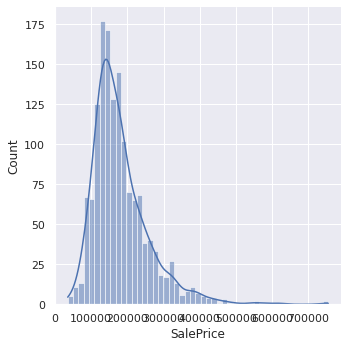

In [17]:
# Analyize target variable 'SalePrice'
sns.displot(df_train['SalePrice'], kde=True)
print('Skewness: {}'.format(df_train['SalePrice'].skew()))
print('Kurtosis: {}'.format(df_train['SalePrice'].kurt()))

Skewness: 0.12156821443518166
Kurtosis: 0.8047636129011364


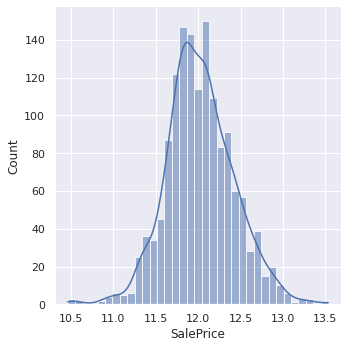

In [18]:
log_y = np.log(df_train['SalePrice'])

sns.displot(log_y, kde=True)
print('Skewness: {}'.format(log_y.skew()))
print('Kurtosis: {}'.format(log_y.kurt()))

In [19]:
# Split the train dataset into train and test samples
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = df_train.drop('SalePrice', axis=1)
X = scaler.fit_transform(X)
y = np.log(df_train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1020, 73), (438, 73), (1020,), (438,))

In [20]:
# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


lr = LinearRegression()
dt =DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
cv = KFold(n_splits=10, shuffle=True, random_state=123)

lr_rmse = round(-cross_val_score(lr, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 4)
lr_r2 = round(cross_val_score(lr, X_train, y_train, cv=cv, scoring='r2').mean(), 4)

dt_rmse = round(-cross_val_score(dt, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 4)
dt_r2 = round(cross_val_score(dt, X_train, y_train, cv=cv, scoring='r2').mean(), 4)

rf_rmse = round(-cross_val_score(rf, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 4)
rf_r2 = round(cross_val_score(rf, X_train, y_train, cv=cv, scoring='r2').mean(), 4)

gb_rmse = round(-cross_val_score(gb, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 4)
gb_r2 = round(cross_val_score(gb, X_train, y_train, cv=cv, scoring='r2').mean(), 4)

xgb_rmse = round(-cross_val_score(xgb, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 4)
xgb_r2 = round(cross_val_score(xgb, X_train, y_train, cv=cv, scoring='r2').mean(), 4)

summary_dict = {'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse],
                'R2 score': [lr_r2, dt_r2, rf_r2, gb_r2, xgb_r2]}

summary = pd.DataFrame(data=summary_dict, index=['Linear regression', 'Decision Tree', 'Random forest', 'Gradient boosting', 'XGBRegressor'])
summary

,RMSE,R2 score
Linear regression,0.1241,0.9052
Decision Tree,0.2223,0.6889
Random forest,0.1398,0.8774
Gradient boosting,0.1238,0.9063
XGBRegressor,0.1443,0.8714


In [21]:
# Hyperparameter tuning for GradientBoostingRegressor
parameters = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
              'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [4, 5, 6, 7, 8]}

gb_grid = GridSearchCV(estimator=gb, param_grid=parameters, cv=2, n_jobs=-1)
gb_grid.fit(X_train, y_train)
print('Best parameters: ', gb_grid.best_params_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


In [22]:
# Predict the test set
gb_final = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=400)
gb_final.fit(X_train, y_train)
test_pred = np.exp(gb_final.predict(scaler.fit_transform(df_test)))
test_pred = pd.DataFrame(test_pred, columns=['SalePrice'])
test_pred

,SalePrice
0,135809.739476
1,165372.467769
2,182340.649637
3,180457.066013
4,182635.860272
...,...
1454,85548.059735
1455,88303.545846
1456,163327.459268
1457,112204.368345


In [23]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe
test_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id']

result = pd.concat([test_id, test_pred], axis=1)
result.head()

,Id,SalePrice
0,1461,135809.739476
1,1462,165372.467769
2,1463,182340.649637
3,1464,180457.066013
4,1465,182635.860272


In [24]:
result.to_csv('submission.csv', index=False)